In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [139]:
data_train = pd.read_csv('train.csv')
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [140]:
print(f'Our datas shape is: {data_train.shape}')
data_train.info()

Our datas shape is: (8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [141]:
#checking for missing values
data_train.isna().sum()/data_train.shape[0]*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [142]:
#view all nominal categories
for i in data_train.select_dtypes(include='object'):
    print(data_train[i].value_counts())
    print("***"*10)

PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: count, Length: 8693, dtype: int64
******************************
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
******************************
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
******************************
Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64
******************************
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
******************************
VIP
False    8291
True      199
Name: count, dtype: int64
******************************
Name
Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala 

In [143]:
#lets change our labels for convinietly
data_train.columns = map(str.lower, data_train.columns)
data_train.columns

Index(['passengerid', 'homeplanet', 'cryosleep', 'cabin', 'destination', 'age',
       'vip', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck',
       'name', 'transported'],
      dtype='object')

In [144]:
#Imputing missing values
from sklearn.impute import SimpleImputer 

categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='mean')

for i in data_train.columns:
    if data_train[i].dtype == object: 
        column = pd.DataFrame(data_train[i])
        data_train[i] = categorical_imputer.fit_transform(column).ravel()
        
    if data_train[i].dtype == 'float64':
        column = pd.DataFrame(data_train[i])
        data_train[i] = numerical_imputer.fit_transform(column).ravel()
data_train.dtypes

passengerid      object
homeplanet       object
cryosleep        object
cabin            object
destination      object
age             float64
vip              object
roomservice     float64
foodcourt       float64
shoppingmall    float64
spa             float64
vrdeck          float64
name             object
transported        bool
dtype: object

In [145]:
#checking for missing values
data_train.isna().sum()/data_train.shape[0]*100

passengerid     0.0
homeplanet      0.0
cryosleep       0.0
cabin           0.0
destination     0.0
age             0.0
vip             0.0
roomservice     0.0
foodcourt       0.0
shoppingmall    0.0
spa             0.0
vrdeck          0.0
name            0.0
transported     0.0
dtype: float64

In [146]:
data_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
passengerid,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homeplanet,8693,3,Earth,4803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cryosleep,8693,2,False,5656,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,8693,6560,G/734/S,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination,8693,3,TRAPPIST-1e,6097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,8693.0,NaN,NaN,NaN,28.82793,14.339054,0.0,20.0,27.0,37.0,79.0
vip,8693,2,False,8494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roomservice,8693.0,NaN,NaN,NaN,224.687617,659.739364,0.0,0.0,0.0,78.0,14327.0
foodcourt,8693.0,NaN,NaN,NaN,458.077203,1594.434978,0.0,0.0,0.0,118.0,29813.0
shoppingmall,8693.0,NaN,NaN,NaN,173.729169,597.41744,0.0,0.0,0.0,45.0,23492.0


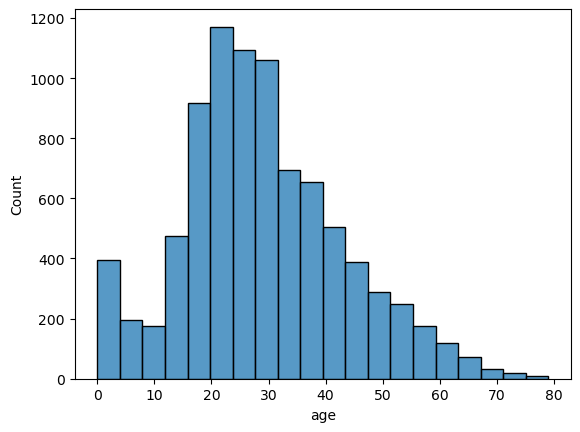

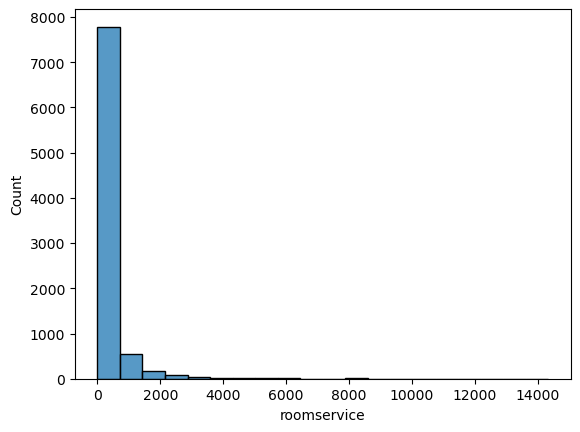

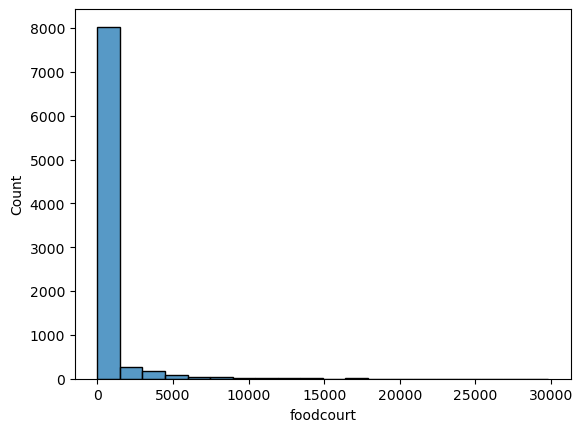

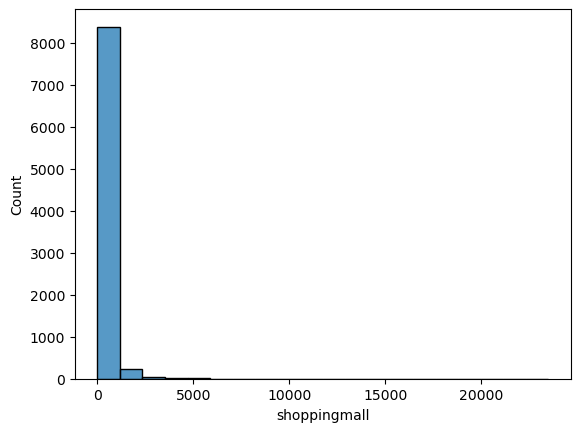

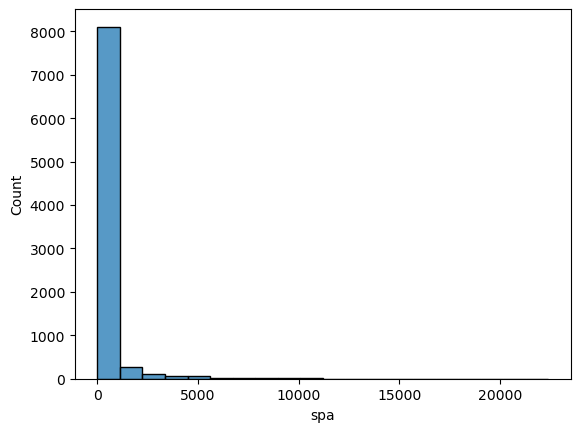

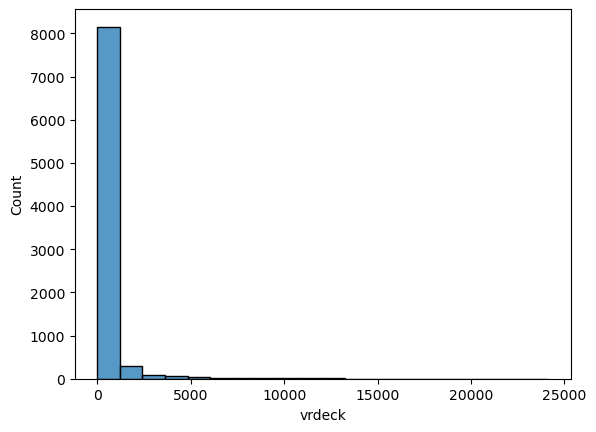

In [147]:
numeric_columns = ['age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']

for i in numeric_columns:
    sns.histplot(data=data_train, x=i, bins=20)
    plt.show()

<Axes: >

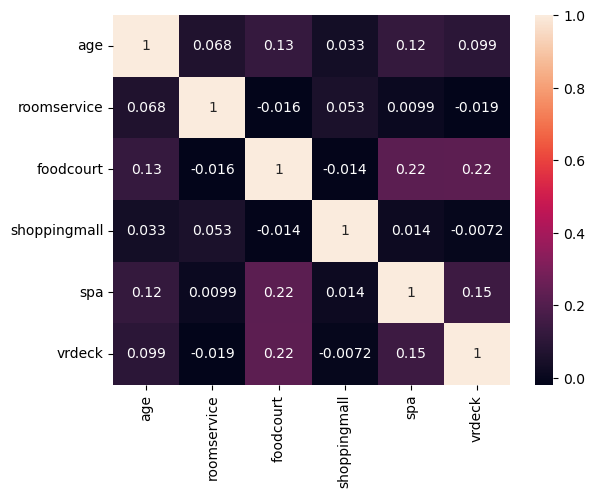

In [148]:
correlation = data_train[numeric_columns].corr()
sns.heatmap(correlation, annot=True)

## HomePlanet

In [149]:
#HomePlanet distribution
planets = data_train['homeplanet']

planets_counts = planets.value_counts()
print(planets_counts)

homeplanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64


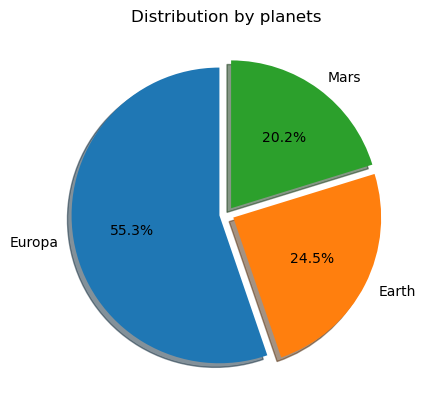

In [150]:
planets_labels = planets.unique()
planets_values = planets_counts.values

fig, ax = plt.subplots()
explode = (0.05, 0.05, 0.05)
ax.pie(planets_values, labels = planets_labels, 
       autopct='%1.1f%%', startangle = 90, explode = explode, shadow = True)
plt.title('Distribution by planets')
plt.show()

homeplanet  transported
Earth       False          2749
            True           2054
Europa      False           727
            True           1404
Mars        False           839
            True            920
dtype: int64


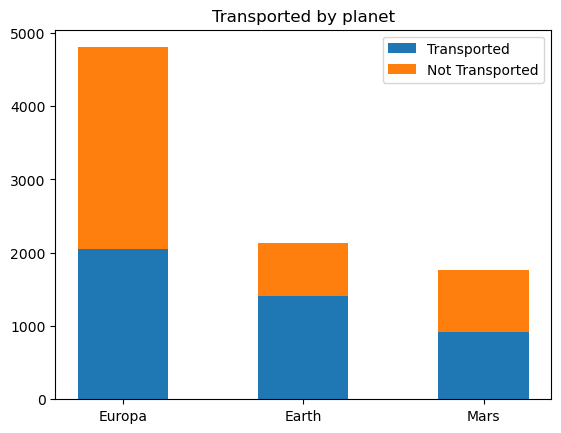

In [151]:
#shows who transported with which plannet
transported = data_train['transported']

planets_transported = data_train.groupby([planets, transported]).size()
transported_true = planets_transported.xs(True, level='transported').values
transported_false = planets_transported.xs(False, level='transported').values
print(planets_transported)

species = ('Europa', 'Earth', 'Mars')
weight_counts = {
    "Transported": transported_true,
    "Not Transported": transported_false,
}

fig, ax = plt.subplots()
bottom = np.zeros(3)
width = 0.5

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

plt.title('Transported by planet')
ax.legend(loc="upper right")
plt.show()

## CryoSleep

In [152]:
cryosleep = data_train['cryosleep']

cryosleep_counts = cryosleep.value_counts()
print(cryosleep_counts)

cryosleep
False    5656
True     3037
Name: count, dtype: int64


cryosleep  transported
False      False          3761
           True           1895
True       False           554
           True           2483
dtype: int64


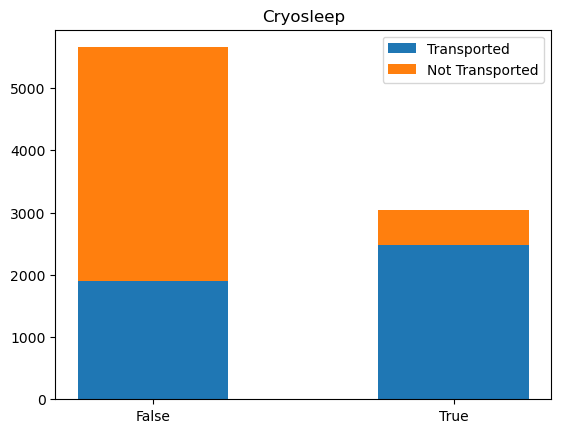

In [153]:
cryosleep_transported = data_train.groupby([cryosleep, transported]).size()
cryosleep_transported_true = cryosleep_transported.xs(True, level='transported').values
cryosleep_transported_false = cryosleep_transported.xs(False, level='transported').values
print(cryosleep_transported)

species = ('False', 'True')
weight_counts = {
    "Transported": cryosleep_transported_true,
    "Not Transported": cryosleep_transported_false,
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.5

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

plt.title('Cryosleep')
ax.legend(loc="upper right")
plt.show()

## One-Hot Encoding

In [154]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

for i in data_train.columns:
    if data_train[i].dtype == 'object':
        #For binary
        if data_train[i].nunique() == 2: data_train[i] = data_train[i].map({True: 1.0, False: 0.0})
        if data_train[i].nunique() == 3:
            idx = data_train.columns.get_loc(i)
            ohetransform = ohe.fit_transform(data_train[[i]])
            data_train.drop(columns=[i], inplace=True)
            for col in reversed(ohetransform.columns):
                data_train.insert(loc=idx, column=col, value=ohetransform[col])
        

data_train.head()

,passengerid,homeplanet_Earth,homeplanet_Europa,homeplanet_Mars,cryosleep,cabin,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,0.0,1.0,0.0,0.0,B/0/P,0.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1.0,0.0,0.0,0.0,F/0/S,0.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,0.0,1.0,0.0,0.0,A/0/S,0.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,0.0,1.0,0.0,0.0,A/0/S,0.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1.0,0.0,0.0,0.0,F/1/S,0.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Cabin

In [155]:
cabin = data_train['cabin']

cabin_first_class = []
cabin_second_class = []
cabin_third_class = []

cabin_classes = [cabin_first_class, cabin_second_class, cabin_third_class]

for i in range(cabin.shape[0]):
    classes = cabin[i].split('/')
    cabin_first_class.append(classes[0])
    cabin_second_class.append(classes[1])
    cabin_third_class.append(classes[2])

idx = data_train.columns.get_loc('cabin')
data_train.drop(columns=['cabin'], inplace=True)
data_train.insert(loc=idx, column='cabin_first_class', value=cabin_first_class)
data_train.insert(loc=idx, column='cabin_second_class', value=cabin_second_class)
data_train.insert(loc=idx, column='cabin_third_class', value=cabin_third_class)

### One-hot encoding for cabin classes

In [156]:
ohetransform = ohe.fit_transform(data_train[['cabin_first_class']])
data_train.drop(columns=['cabin_first_class'], inplace=True)
for col in reversed(ohetransform.columns):
                data_train.insert(loc=idx, column=col, value=ohetransform[col])

### Change type of data for cabin second class

In [157]:
data_train.cabin_second_class = pd.to_numeric(data_train['cabin_second_class']).astype('float64')

### One-hot-encoding for third class

In [158]:
data_train.cabin_third_class = data_train.cabin_third_class.map({'P': 0, 'S': 1})

In [159]:
data_train.head()

,passengerid,homeplanet_Earth,homeplanet_Europa,homeplanet_Mars,cryosleep,cabin_first_class_A,cabin_first_class_B,cabin_first_class_C,cabin_first_class_D,cabin_first_class_E,...,destination_TRAPPIST-1e,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Roomservice | Foodcourt | Shoppingmall | Spa | Vrdeck

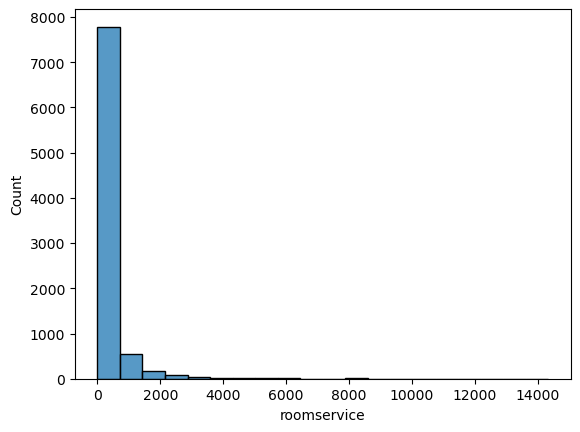

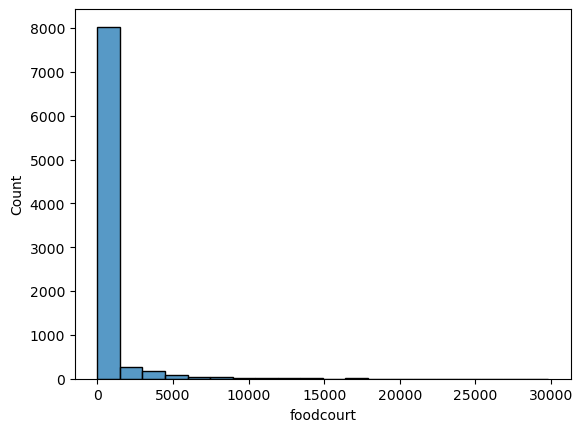

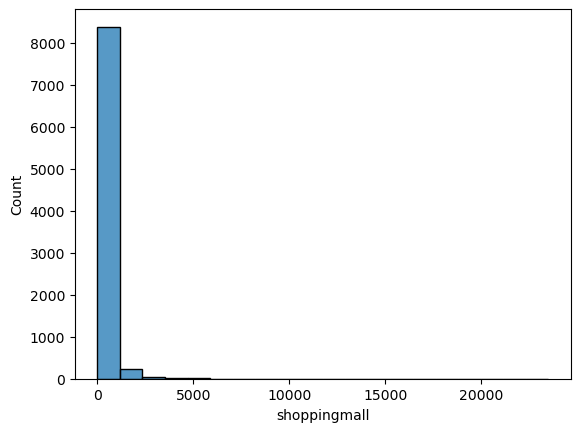

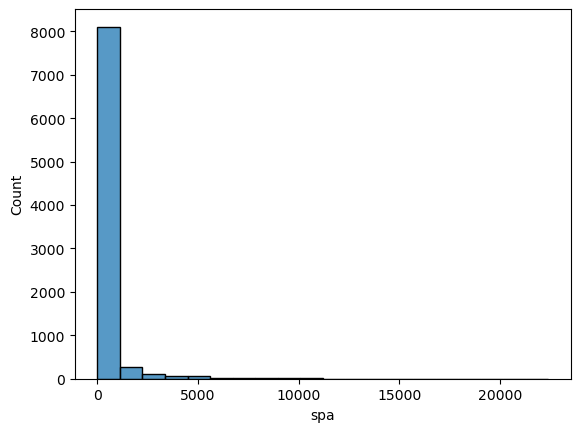

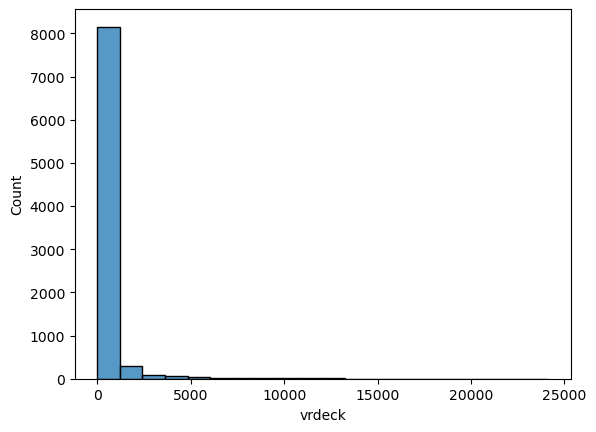

Count of zero values in column roomservice : 5577
Count of non zero values in column roomservice : 3116
Count of zero values in column foodcourt : 5456
Count of non zero values in column foodcourt : 3237
Count of zero values in column shoppingmall : 5587
Count of non zero values in column shoppingmall : 3106
Count of zero values in column spa : 5324
Count of non zero values in column spa : 3369
Count of zero values in column vrdeck : 5495
Count of non zero values in column vrdeck : 3198


In [160]:
our_columns = ['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']

for i in our_columns:
    sns.histplot(data=data_train, x=i, bins=20)
    plt.show()

for i in data_train.columns:
    if i in our_columns:
        print(f'Count of zero values in column {i} : {(data_train[i] == 0).sum()}')
        print(f'Count of non zero values in column {i} : {(data_train[i] > 0).sum()}')
        data_train[i] = (data_train[i] > 0).astype(int)


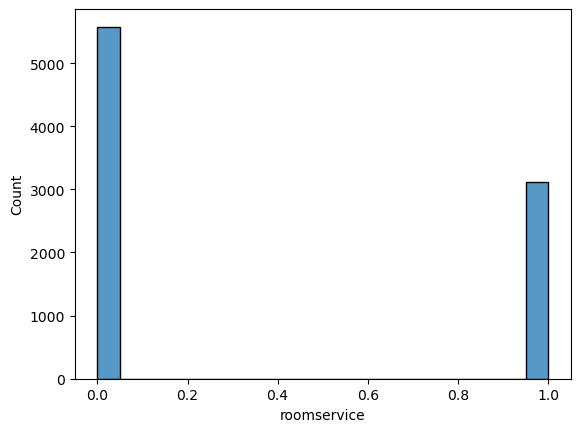

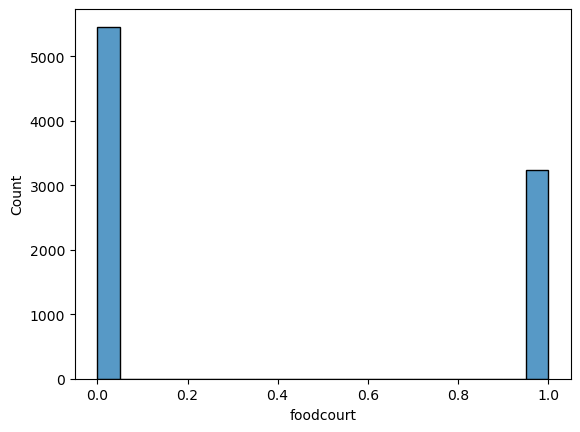

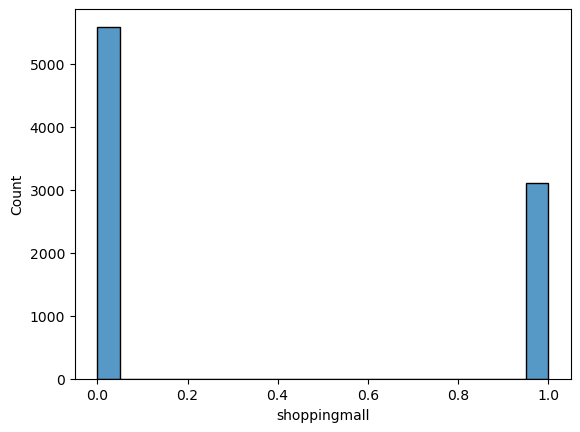

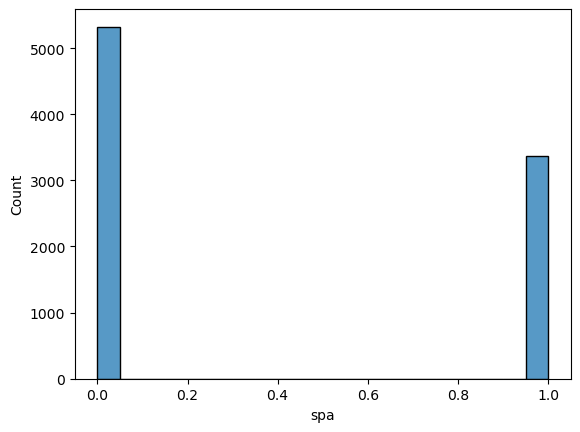

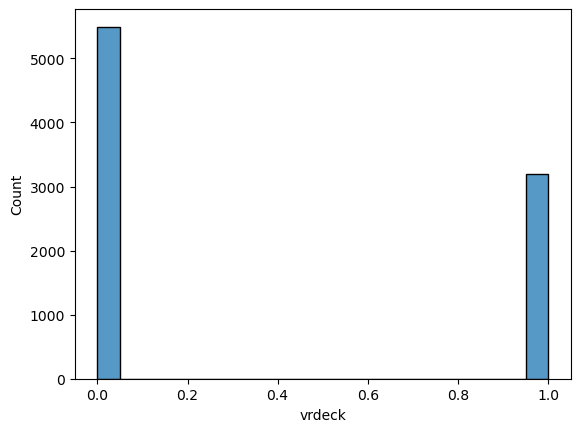

In [161]:
for i in our_columns:
    sns.histplot(data=data_train, x=i, bins=20)
    plt.show()

In [162]:
data_train.head()

,passengerid,homeplanet_Earth,homeplanet_Europa,homeplanet_Mars,cryosleep,cabin_first_class_A,cabin_first_class_B,cabin_first_class_C,cabin_first_class_D,cabin_first_class_E,...,destination_TRAPPIST-1e,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,39.0,0.0,0,0,0,0,0,Maham Ofracculy,False
1,0002_01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,24.0,0.0,1,1,1,1,1,Juanna Vines,True
2,0003_01,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,58.0,1.0,1,1,0,1,1,Altark Susent,False
3,0003_02,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,33.0,0.0,0,1,1,1,1,Solam Susent,False
4,0004_01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,16.0,0.0,1,1,1,1,1,Willy Santantines,True


## Chose model

In [163]:
data_model = data_train.copy()
data_model = data_model.drop(columns=['passengerid', 'name'])

x = data_model.iloc[:, :-1]
y = data_model.iloc[:, -1]

In [164]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=78
)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = [
    LogisticRegression(max_iter=200),           
    RandomForestClassifier(n_estimators=100),   
    GradientBoostingClassifier(n_estimators=100), 
    DecisionTreeClassifier(),                    
    SVC()                                       
]

for model in models:
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test) 
    accuracy = accuracy_score(y_test, y_pred) 
    print(f'{model.__class__.__name__}: Accuracy = {accuracy:.2f}')

LogisticRegression: Accuracy = 0.74
RandomForestClassifier: Accuracy = 0.73
GradientBoostingClassifier: Accuracy = 0.74
DecisionTreeClassifier: Accuracy = 0.67
SVC: Accuracy = 0.55
